In [1]:
import matplotlib.pyplot as plt

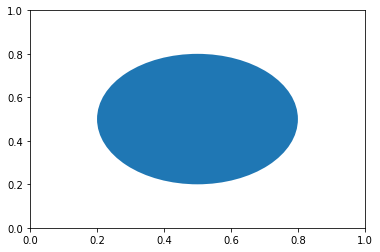

In [10]:
fig, ax = plt.subplots()
c = plt.Circle((0.5,0.5), 0.3)
ax.add_artist(c)

In [9]:
type(c).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

# Aspect Ratio

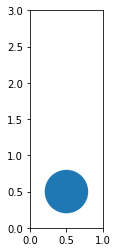

In [18]:
fig, ax = plt.subplots()
ax.set_ylim(0, 3)
ax.set_aspect(1)
c = plt.Circle((0.5,0.5), 0.3)
ax.add_artist(c)

# Coordinate Reference Systems

Controlled "transformers".

In [43]:
%config InlineBackend.print_figure_kwargs

{'bbox_inches': 'tight'}

In [44]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

72.0
432.0 288.0


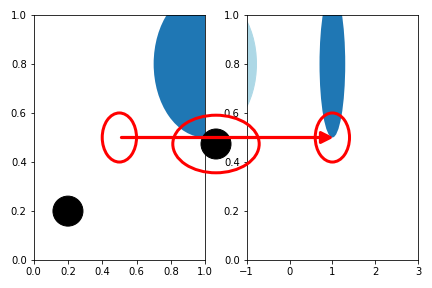

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax2.set_xlim((-1, 3))

# 1. transData (default)

c = plt.Circle((1,0.8), 0.3, transform=ax1.transData)
ax1.add_artist(c)

# mix+match ax1/ax2
c = plt.Circle((1,0.8), 0.3, transform=ax1.transData, color="lightblue")
ax2.add_artist(c)

c = plt.Circle((1,0.8), 0.3) # default: transform=ax2.transData
ax2.add_artist(c)

# 2. transAxes+transFigure (0-to-1 scaling)
c = plt.Circle((0.5,0.5), 0.1, transform=ax1.transAxes,
               edgecolor="red", facecolor="none", linewidth=3)
ax1.add_artist(c)

c = plt.Circle((0.5,0.5), 0.1, transform=ax2.transAxes,
               edgecolor="red", facecolor="none", linewidth=3)
ax2.add_artist(c)

c = plt.Circle((0.5,0.5), 0.1, transform=fig.transFigure,
               edgecolor="red", facecolor="none", linewidth=3)
fig.add_artist(c)

# 3. "display" coordinates (None)

# pixel/dot is a point on screen with it's own color
print(fig.dpi) # pixels per inch

# this fig is 4 inches wide, 6 inches tall
raw_width = 6 * fig.dpi
raw_height = 4 * fig.dpi
print(raw_width, raw_height)

c = plt.Circle((raw_width/2, raw_height/2), 15, transform=None,
               color="black")
fig.add_artist(c)

plt.tight_layout()
fig.savefig("temp.png")

# 4. use data coordinates for position, raw coordinates for the radius
x, y = ax1.transData.transform((0.2,0.2))
c = plt.Circle((x,y), radius=15, transform=None, color="black")
ax1.add_artist(c)

# 5. FancyArrowPatch
from matplotlib.patches import FancyArrowPatch
x1,y1 = ax1.transAxes.transform((0.5,0.5))
x2,y2 = ax2.transAxes.transform((0.5,0.5))
arrow = FancyArrowPatch((x1,y1), (x2,y2), transform=None,
                        color="red",
                        linewidth=3, arrowstyle="simple,head_length=10,head_width=10")
fig.add_artist(arrow)

# Directional Scatter Plot

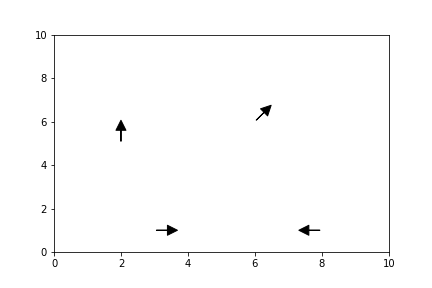

In [73]:
import pandas as pd
import math

df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for row in df.itertuples():
    x, y = ax.transData.transform((row.x, row.y))
    
    # version 1: draw circle at each point
    # c = plt.Circle((x, y), radius=5, transform=None)
    # ax.add_artist(c)
    
    # version 2: draw a correct arrow at each point
    a = math.radians(row.a)
    y_diff = math.sin(a) * 25
    x_diff = math.cos(a) * 25
    arrow = FancyArrowPatch((x,y), (x+x_diff,y+y_diff), transform=None, color="k",
                            arrowstyle="simple,head_width=10,head_length=10")
    ax.add_artist(arrow)